## (b) Focus on how linear and non-linear models can be learned using matrix inverses. Discuss the relationship between model complexity (e.g., polynomial degree) and the amount of data needed to accurately train these models with matrix inverses.

- The exercise fits polynomial models to data
- Parameters are learned using matrix inverses
- “The goal is to learn model parameters analytically using linear algebra.”

## Presentation
- Polynomial regression
    - $b=Aw$
    - $w = A^{-1}b$
- linear and non-linear
    - All we need is for function to be linear in the model parameters $w$
- Higher polynomial degree → more parameters
- More parameters → more data needed to fit
    - For an n’th order polynomial you need a minimum of n+1 points (data) to fit it
- Risk of overfitting
    - Using too high dimensionality for your input will result in overfitting
- Matrix inverse becomes unstable with insufficient data
    - Can’t do regression if you don’t have the data for it (5. order polynomial to 2 data points won’t work. Will have infinite solutions)
    - “Matrix inverses allow exact model fitting, but model complexity must be matched with sufficient data.”


# Polynomial models

**Overview**
In this exercise you will implement a method to estimate/learn the model parameters of single variate (single input) 2-nd and 3-rd order polynomials and use these models to predict labels for new datapoints. Next week you will extend this method to $n$-th order, single variate polynomials. 


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#inclass">Task 1: In-class exercise</a>
            </li>
            <li>
            <a href="#loading7">Task 2: Data preparation (data wrangling)</a>
            </li>
            <li>
            <a href="#loading8">Task 3: Constructing the design matrix</a>
            </li>
            <li>
            <a href="#loading9">Task 4: Inverting the design matrix</a>
            </li>
            <li>
            <a href="#loading10">Task 5: Plotting</a>
            </li>
            <li>
            <a href="#loading10130">Task 6: Making predictions</a>
            </li>
            <li>
            <a href="#loading12">Task 7: Load data</a>
            </li>
            <li>
            <a href="#loading11">Task 8: Third order polynomials</a>
            </li>
            <li>
            <a href="#loading13">Task 9: Plotting</a>
            </li>
            <li>
            <a href="#loading145">Task 10: Observe</a>
            </li>
            <li>
            <a href="#loading100">Task 11: Making predictions</a>
            </li>
            <li>
            <a href="#loading1030">Task 12: Observe</a>
            </li>
        </ul>
    </div>
</article>

## 1st-order Polynimial model

---
**Task 1 (easy): In-class exercise👩‍💻**
1. Finish all of the tasks from the W3 in-class exercise
.

**Note:** If you attented the lecture and in-class exercise you are all set.


---## 2nd-order Polynomial model
A 2nd-order polynomial model, also known as a quadratic model, can be expressed as:

$$ y = w_0 + w_1 x + w_2 x^2 $$
This non-linear model assumes that the relationship between the input $x$ and the label $y$ is quadratic. This way a "curved" relationship between inputs and outputs can be modelled which can capture patterns that a simple linear model might miss. 
By _fitting_ this model, the aim is to learn the parameters $w_0$, $w_1$, and $w_2$ that minimize the difference (the error) between the predicted values and the output (labels), providing a more flexible fit compared to a linear model.
**Note:** In this exercise a minimum number of points to fit the model is used, therefore the error between predicted values and actual data will always be 0.


---
**Task 2 (easy): Load data👩‍💻**
1. Run the cell below to load libraries and construct the datasets.


---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import util_week3 #import exercise specific functionality

quadratic_dataset_1 = np.array([[1, 2], 
                                [2, 3], 
                                [3, 6]])

quadratic_dataset_2 = np.array([[9, 3], 
                                [7, 5], 
                                [1, 9]])

quadratic_dataset_3 = np.array([[8, 4], 
                                [10, 5], 
                                [3, 1]])

Throughout the next tasks, the aim is to construct the design matrix using the known variables, followed by learning the model parameters (solving) using the inverse of the design matrix. The subsequent tasks involve using the learnt model parameters to predict new unseen inputs and plotting the results.

---
**Task 3 (easy): Data preparation (data wrangling)👩‍💻**
1. For each dataset identify which values correspond to inputs and which are the labels.
2. Complete the `separate_inputs_labels`
 function below. The function takes a dataset as input and returns the inputs as the `X_quadratic`
 matrix and the labels as the `y_quadratic`
 vector.


---

In [3]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X_quadratic (3x1 numpy array): The input matrix.
    y_quadratic (1x3 numpy array): The labels vector.
    """
    
    # I FUCKING HATE PYTHON SLICING ITS CURSED ITS WRONG AND ITS UNAMERICAN
    X_quadratic = dataset[:,:1]
    y_quadratic = dataset[:,1]
    return X_quadratic, y_quadratic

# Applying the function to each quadratic dataset
X1_quadratic, y1_quadratic = separate_inputs_labels(quadratic_dataset_1)
X2_quadratic, y2_quadratic = separate_inputs_labels(quadratic_dataset_2)
X3_quadratic, y3_quadratic = separate_inputs_labels(quadratic_dataset_3)

print("X1_quadratic: \n", X1_quadratic)
print("y1_quadratic: \n", y1_quadratic)

X1_quadratic: 
 [[1]
 [2]
 [3]]
y1_quadratic: 
 [2 3 6]



---
**Task 4 (easy): Constructing the design matrix👩‍💻**
Reuse the code from the W3 in-class exercise
:
1. For each data set construct the design matrix for a 2nd order polynomial.
2. Print the results.


---

In [4]:
def create_design_matrix(inputs):
    return np.array([[c[0] ** 2, c[0], 1] for c in inputs])
        

X1_quadratic_design = create_design_matrix(X1_quadratic)
print("Design Matrix for Dataset 1:\n", X1_quadratic_design)

Design Matrix for Dataset 1:
 [[1 1 1]
 [4 2 1]
 [9 3 1]]



---
**Task 5 (easy): Inverting the design matrix👩‍💻**
1. Compute the inverse of each design matrix.
2. Compute the model parameters (referenced as `weigths`
 in the cells below), then print the results.


---

In [5]:
X2_quadratic_design = create_design_matrix(X2_quadratic)
X3_quadratic_design = create_design_matrix(X3_quadratic)

inv = np.linalg.inv

X1I = inv(X1_quadratic_design)
X2I = inv(X2_quadratic_design)
X3I = inv(X3_quadratic_design)

weights1_quadratic = X1I@y1_quadratic
weights2_quadratic = X2I@y2_quadratic
weights3_quadratic = X3I@y3_quadratic

print("Model parameters for Model 1:", weights1_quadratic)

Model parameters for Model 1: [ 1. -2.  3.]



---
**Task 6 (easy): Plotting👩‍💻💡**
1. Use the `plot_quadratic_model`
 function from the `util_polynimial.py`
 file to plot the results. The input parameters are:    - `X`
(Nx1 numpy array): input
    - `y`
(Nx1 numpyarray): labels
    - `weights`
(Nx1 numpyarray): model weights 




---

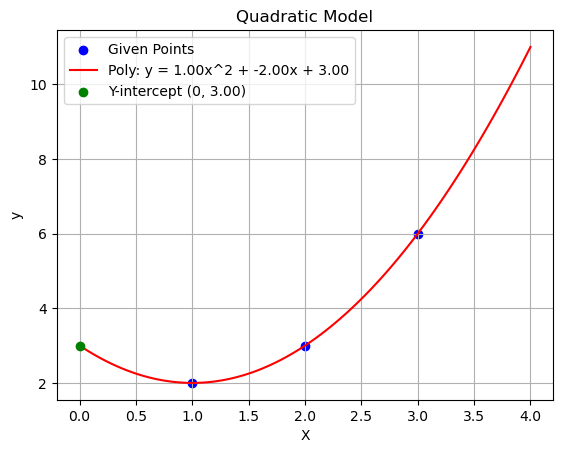

In [6]:
util_week3.plot_quadratic_model(X1_quadratic, y1_quadratic, weights1_quadratic)


---
**Task 7 (easy): Observe💡**
1. Visually inspect the plots and discuss how the model parameters influence the shape and position of the fitted curve. 
2. Compare the results of the polynomial model to the outcome of the linear model implemented in the in-class exercise.
3. What are the pre(di)c(k)(-i)ted value for $x = 0.5, x = 2.5, x = 3.5$, how does it relate to the graph?


---

# 1. I am convinced
a is the growth rate of the polynomial
b is the weird inverse parabula skew where the graph follows the inverse parabula whilst keeping the same y intersect
c is the y intersect

# 2. What?

# 3. as seen in the calculation be low
It is in fact [2.25 4.25 8.25]


In [7]:
# Write your reflections here..

new_guy = np.array([[0.5],[2.5],[3.5]])

new_design = create_design_matrix(new_guy)

out_guy = new_design@weights1_quadratic

print(out_guy)

[2.25 4.25 8.25]


Use the polynomial equation with the learned model parameters on the new inputs to make predictions.

---
**Task 8 (easy): Making predictions👩‍💻💡**
The cell below contains an array of new inputs. Follow these steps to predict a label for each the new input:
1. For each trained model, use the model parameters to predict a label for the new input. The model parameters for the different models should lead to different predictions. Store the predicted label as a separate variable. 
2. Plot the results using the function `plot_quadratic_model_with_predictions`
 from the `util_week3.py`
 file. The input parameters of the function are:    - `X`
(Nx1 numpy array): input
    - `y`
(Nx1 numpyarray): labels
    - `weights`
(Nx1 numpyarray): model weights 
    - `x`
(Mx1 numpy array): new inputs
    - `y'`
 (Mx1 numpy array): new input predictions


3. Compare the plots and the predicted labels obtained with the different models.
4. Extend the `new_inputs`
 array with the points `1.5`
 and `-1`
. Follow the same steps as above to obtain predicted labels for each input. 
5. Follow the steps above to predict 3 lavels for each model. A total of 9 predicted values must be submitted as part of the **mandatory** activity on [Grasple](https://app.grasple.com/#/courses/10532/ci/734077/diagnoses/12887)



---

In [8]:
# New array of inputs for prediction, currently containing a single element
new_input = np.array([[14],[1.5],[-1]])

design_new_input = create_design_matrix(new_input)

prediction1 = design_new_input@weights1_quadratic
prediction2 = design_new_input@weights2_quadratic
prediction3 = design_new_input@weights3_quadratic

print(prediction1, prediction2,prediction3)

[171.     2.25   6.  ] [-3.45833333  8.78125     9.66666667] [ 6.65714286 -0.03928571 -1.91428571]


## 3rd-order Polynomial models
This exercise is about learning third order polynomials.
A 3rd-order polynomial model is given by:

$$ y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 $$
A 3rd-order polynomial allow for more flexibility than the previous models by adding the cubic term $x^3$
In the next tasks you will follow similar steps as with 1. and 2. order polynomial. This includes:
1. Preparing the dataset.
2. Constructing the design matrix.
3. Calculating the model weights.
4. Plotting the results.
5. Using the model to make predictions for new inputs.


---
**Task 9 (easy): Load data👩‍💻**
1. Run the cell below to construct a new dataset.


---

In [9]:
cubic_dataset = np.array([[7, 6], [5, 24], [8, 60], [1, 120]])


---
**Task 10 (easy): Third order polynomials👩‍💻**
1. For the cubic dataset identify which values correspond to inputs and which are the ground truth labels.
2. Create a $4 \times 1$ matrix called `X_cubic`
 that contain the inputs, and a vector called `y_cubic`
 containing the corresponding ground truth labels.
3. Create the design matrix for the cubic model.
4. Calculate the inverse of the design matrix.
5. Follow the same procedure as previous to compute the model parameters.


---

In [53]:
# Write your solution here
"""
1.
fst value in tuple is the input
snd value in tuple is the output (ground thruth?)
"""

X_cubic = cubic_dataset[:, 0]
y_cubic = cubic_dataset[:, 1]

cubic_design_matrix = lambda xs: np.array([[x**3, x**2, x, 1] for x in xs])

design = cubic_design_matrix(X_cubic)


---
**Task 11 (easy): Plotting👩‍💻💡**
1. Use the `plot_cubic_model`
 function to plot the results. The input parameters of the function are:    - `X`
(Nx1 numpy array): input
    - `y`
(Nx1 numpyarray): labels
    - `weights`
(Nx1 numpyarray): model weights 


2. Visually inspect the plots and discuss how the model parameters influence the shape and position of the fitted curve.


---

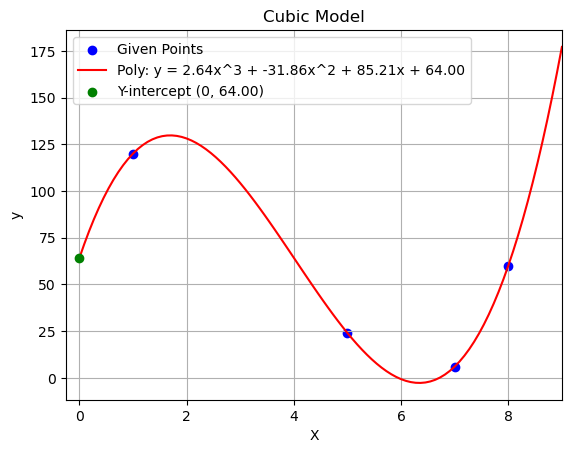

'\nIt is a third order polynomial, since we have four points to make a third order polynomial it is a perfect fit (just like my jeans)\n'

In [54]:
#Plot the data and fitted cubic model for the dataset
weights = np.linalg.inv(design) @ y_cubic
util_week3.plot_cubic_model(X_cubic, y_cubic, weights)

"""
It is a third order polynomial, since we have four points to make a third order polynomial it is a perfect fit (just like my jeans)
"""


---
**Task 12 (easy): Observe💡**
1. Compare the results of the 3rd order polynomial to the 1st and 2nd order models. Based on the plots, which model shows the best fit?
2. What happens when trying to fit the model using dataset 1, 2 and 3. What goes wrong?


---

In [55]:
# Write your reflections here...
"""
The first order is not that great as it is nowhere to be found
The second order is pretty good as it was made on 3 points making it a perfect fit for a second order polynomial
for the third order polynomial -,,-

The points do not match up leading to a shape-mismatch in the dot product-calculations (it is not possible)
"""

'\nThe first order is not that great as it is nowhere to be found\nThe second order is pretty good as it was made on 3 points making it a perfect fit for a second order polynomial\nfor the third order polynomial -,,-\n\nThe points do not match up leading to a shape-mismatch in the dot product-calculations (it is not possible)\n'


---
**Task 13 (easy): Making predictions👩‍💻💡**
In this task, the learned 3rd order polynomial model is used to predict labels for the `new_inputs`
 array defined below.
1. Use the obtained cubic model parameters to predict labels for the new inputs. 
2. Plot the results using the `plot_cubic_model_with_predictions`
 function in the `util_polynomial.py`
 file. The input parameters of the function are:    - `X`
(Nx1 numpy array): input
    - `y`
(Nx1 numpyarray): labels
    - `weights`
(Nx1 numpyarray): model weights 
    - `x`
(Mx1 numpy array): new inputs
    - `y'`
 (Mx1 numpy array): new input predictions




---

[(-1.0, -55.71428571428575), (1.5, 129.06249999999994), (3.0, 104.28571428571416), (6.0, -0.714285714286035), (12.0, 1065.999999999999), (14.0, 2265.0)]


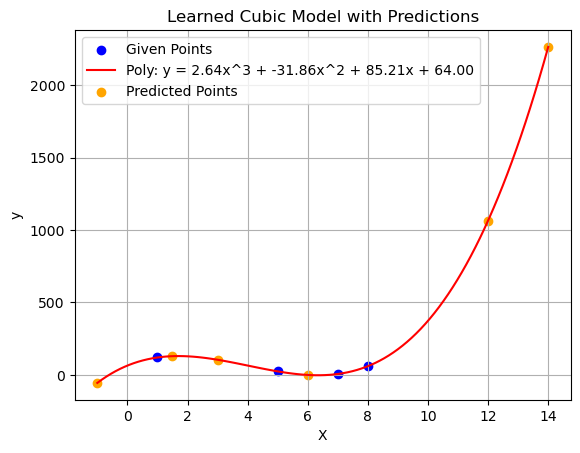

In [61]:
new_inputs = np.array([14, 1.5, -1, 3, 6, 12])

new_inputs_design = cubic_design_matrix(new_inputs)

y_prime = new_inputs_design@weights

print(sorted(zip(map(float, new_inputs),map(float, y_prime)), key=lambda t: t[0]))

util_week3.plot_cubic_model_with_predictions(X_cubic, y_cubic, weights, new_inputs, y_prime)


---
**Task 14 (easy): Observe💡**
1. What are the precited value for $x = 3$, $x = 6$, $x = 12$, how does it relate to the graph?
2. Compare the predictions of the cubic model with the predicitons of the quadratic models.
3. Which model is prefered in terms of representing the relationship between inputs and outputs and why?
4. What is the difference between the design matrix and the data matrix?
5. What is the difference between the design matrices of different order polynomials? And how does that relate to the datamatrix?


---

In [0]:
#Write your reflection here...
"""
1.
 x=3  => 104.28
 x=6  => -0.71
 x=12 => 1065.99

2.

4.
 The design matrix is a representation of transformed input-data used to make an affine model seem like a linear model, the data matrix is the actual data before the transformation

5.
 They are bigger based on the order NxP where N is the order of the polynomial and P is the number of points


"""



---
**Task 15 (easy): Observe💡**
1. For which values of $x$ is $y = 0$? 
2. How many of these exists?


---

In [ ]:
"""
a bit less than 6, a bit more than 6 and somewhere in the negatives
there are 3 which is the maximum possible roots possible for a third order polynomial
"""

LinAlgError: Last 2 dimensions of the array must be square